In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First rows of the dataset:


,model,num_parameters,num_requests,max_batch_size,actual_batch_size_weighted_mean,actual_batch_size_std,mfu_mean,average_power_watts,peak_power_watts,total_energy_kwh,tokens_per_second,execution_time_s
0,meta-llama/Meta-Llama-3-8B,8.000000e+09,1024,1,1.000000,0.000000,7.312261,153.596639,400.0,0.158322,0.0,1187.415662
1,meta-llama/Meta-Llama-3-8B,8.000000e+09,1024,2,1.977432,0.148523,12.607271,189.404436,400.0,0.091836,0.0,688.771654
2,meta-llama/Meta-Llama-3-8B,8.000000e+09,1024,4,3.860139,0.626757,19.590578,235.235628,400.0,0.059108,0.0,443.306754
3,meta-llama/Meta-Llama-3-8B,8.000000e+09,1024,8,7.381348,1.966708,27.145309,283.374406,400.0,0.042663,0.0,319.975368
4,meta-llama/Meta-Llama-3-8B,8.000000e+09,1024,16,13.612691,5.396769,33.343578,321.519325,400.0,0.034737,0.0,260.524249



Summary statistics:


,num_parameters,num_requests,max_batch_size,actual_batch_size_weighted_mean,actual_batch_size_std,mfu_mean,average_power_watts,peak_power_watts,total_energy_kwh,tokens_per_second,execution_time_s
count,8.000000e+00,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.0,8.000000
mean,8.000000e+09,1024.0,31.875000,18.123939,14.107466,27.684242,283.972672,400.0,0.059081,0.0,443.105644
std,0.000000e+00,0.0,44.266845,19.705238,21.556903,13.315118,83.383537,0.0,0.045614,0.0,342.107910
min,8.000000e+09,1024.0,1.000000,1.000000,0.000000,7.312261,153.596639,400.0,0.027318,0.0,204.886842
25%,8.000000e+09,1024.0,3.500000,3.389462,0.507198,17.844751,223.777830,400.0,0.029808,0.0,223.557438
50%,8.000000e+09,1024.0,12.000000,10.497020,3.681739,30.244443,302.446866,400.0,0.038700,0.0,290.249808
75%,8.000000e+09,1024.0,40.000000,27.221824,17.699229,38.891948,354.139584,400.0,0.067290,0.0,504.672979
max,8.000000e+09,1024.0,128.000000,55.544643,60.918743,42.405083,373.148801,400.0,0.158322,0.0,1187.415662


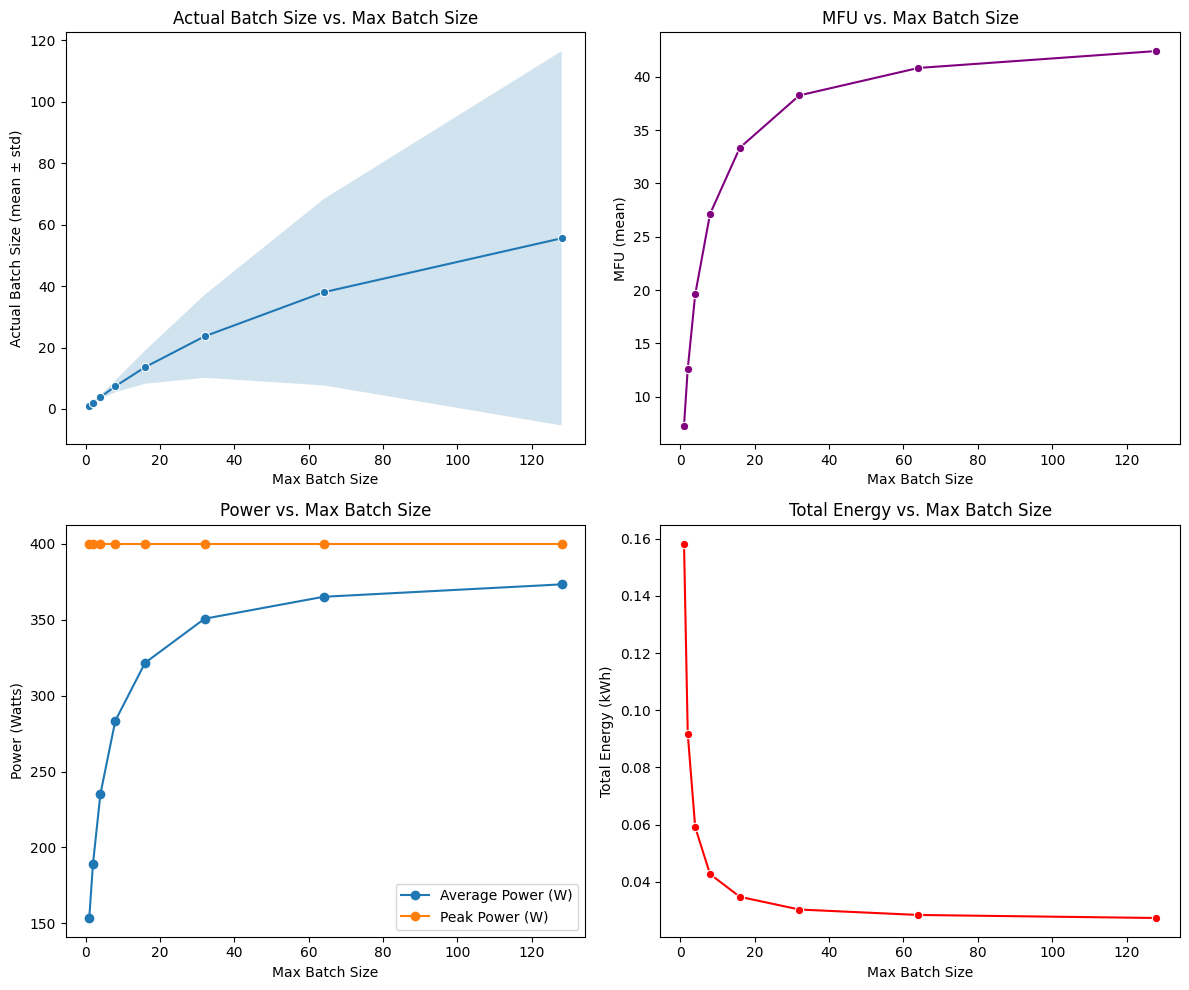

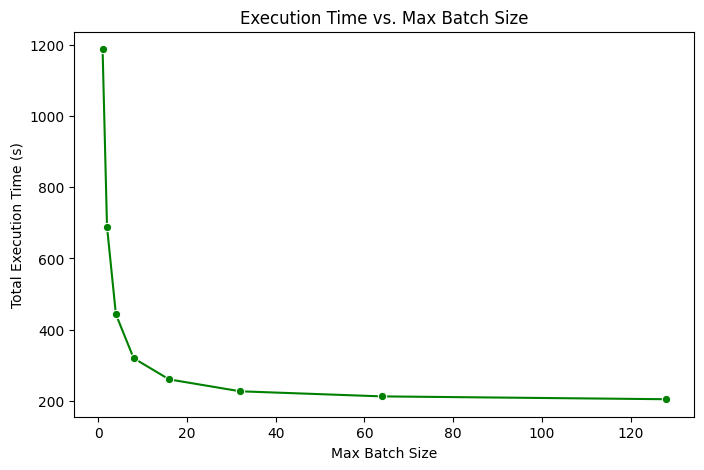

Correlation Matrix:


,max_batch_size,actual_batch_size_weighted_mean,mfu_mean,average_power_watts,total_energy_kwh,execution_time_s
max_batch_size,1.000000,0.978114,0.743208,0.727997,-0.517040,-0.517040
actual_batch_size_weighted_mean,0.978114,1.000000,0.848246,0.835004,-0.619751,-0.619751
mfu_mean,0.743208,0.848246,1.000000,0.999644,-0.898470,-0.898470
average_power_watts,0.727997,0.835004,0.999644,1.000000,-0.908108,-0.908108
total_energy_kwh,-0.517040,-0.619751,-0.898470,-0.908108,1.000000,1.000000
execution_time_s,-0.517040,-0.619751,-0.898470,-0.908108,1.000000,1.000000


In [2]:
# File path to the results CSV, update based on the path to your results file
file_path = "/Users/mirayozcan/Desktop/vidur_copy/vidur/simulator_output/exp3-batchsize-power-energy/experiment_results_summary.csv"
df = pd.read_csv(file_path)

# 2. Basic Info
print("First rows of the dataset:")
display(df.head())

print("\nSummary statistics:")
display(df.describe())

# 3. Convert columns to numeric if needed (probably not necessary since they're numeric, but just in case)
numeric_cols = [
    "num_parameters", "num_requests", "max_batch_size", 
    "actual_batch_size_weighted_mean", "actual_batch_size_std", 
    "mfu_mean", "average_power_watts", "peak_power_watts", 
    "total_energy_kwh", "tokens_per_second", "execution_time_s"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# 4. Sort by batch size for line plots
df = df.sort_values(by="max_batch_size")

###############################################################################
# 5. Visualization
#    We'll create a 2x2 grid of subplots, plus one more if you'd like. 
###############################################################################
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (A) Actual Batch Size vs. Max Batch Size
#     We'll show weighted mean with ± std as error bars
sns.lineplot(
    ax=axes[0,0],
    data=df,
    x="max_batch_size",
    y="actual_batch_size_weighted_mean",
    marker="o"
)
axes[0,0].fill_between(
    df["max_batch_size"],
    df["actual_batch_size_weighted_mean"] - df["actual_batch_size_std"],
    df["actual_batch_size_weighted_mean"] + df["actual_batch_size_std"],
    alpha=0.2
)
axes[0,0].set_title("Actual Batch Size vs. Max Batch Size")
axes[0,0].set_xlabel("Max Batch Size")
axes[0,0].set_ylabel("Actual Batch Size (mean ± std)")

# (B) MFU (Model FLOPs Utilization) vs. Max Batch Size
sns.lineplot(
    ax=axes[0,1],
    data=df,
    x="max_batch_size",
    y="mfu_mean",
    marker="o",
    color="purple"
)
axes[0,1].set_title("MFU vs. Max Batch Size")
axes[0,1].set_xlabel("Max Batch Size")
axes[0,1].set_ylabel("MFU (mean)")

# (C) Average & Peak Power vs. Max Batch Size
#     We'll show them on the same plot for comparison
axes[1,0].plot(
    df["max_batch_size"], df["average_power_watts"], 
    marker="o", label="Average Power (W)"
)
axes[1,0].plot(
    df["max_batch_size"], df["peak_power_watts"], 
    marker="o", label="Peak Power (W)"
)
axes[1,0].set_title("Power vs. Max Batch Size")
axes[1,0].set_xlabel("Max Batch Size")
axes[1,0].set_ylabel("Power (Watts)")
axes[1,0].legend()

# (D) Total Energy vs. Max Batch Size
sns.lineplot(
    ax=axes[1,1],
    data=df,
    x="max_batch_size",
    y="total_energy_kwh",
    marker="o",
    color="red"
)
axes[1,1].set_title("Total Energy vs. Max Batch Size")
axes[1,1].set_xlabel("Max Batch Size")
axes[1,1].set_ylabel("Total Energy (kWh)")

plt.tight_layout()
plt.show()

###############################################################################
# 6. OPTIONAL: Show how Execution Time changes with Batch Size
###############################################################################
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df,
    x="max_batch_size",
    y="execution_time_s",
    marker="o",
    color="green"
)
plt.title("Execution Time vs. Max Batch Size")
plt.xlabel("Max Batch Size")
plt.ylabel("Total Execution Time (s)")
plt.show()

###############################################################################
# 7. Observations / Next Steps:
# - This code reveals how batch size scaling influences power, energy, MFU, etc.
# - If you want to see correlation between these metrics, you can do:
###############################################################################
corr_matrix = df[[
    "max_batch_size","actual_batch_size_weighted_mean","mfu_mean",
    "average_power_watts","total_energy_kwh","execution_time_s"
]].corr()
print("Correlation Matrix:")
display(corr_matrix)

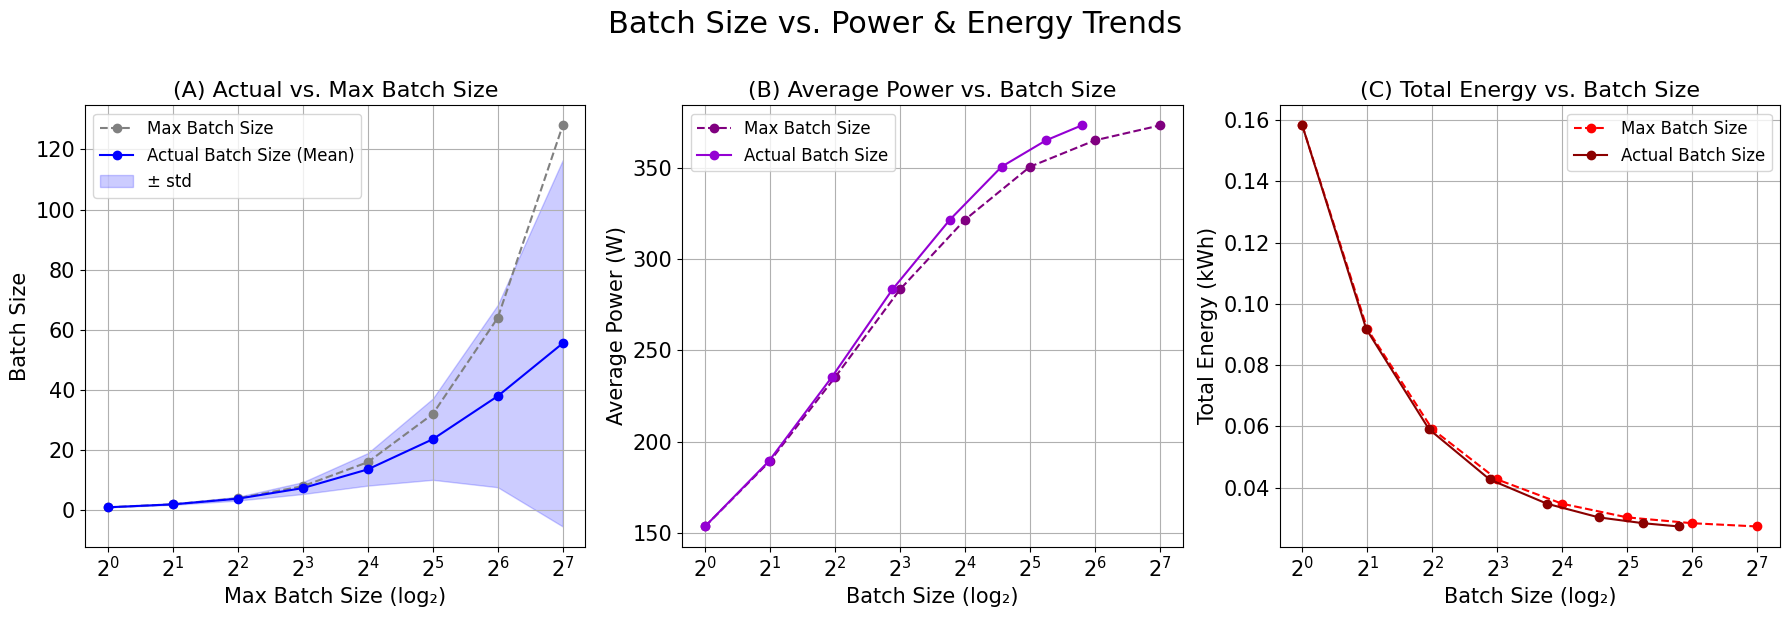

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sort by max_batch_size
df = df.sort_values(by="max_batch_size")

# Define log2-based x-ticks
log2_ticks = [1, 2, 4, 8, 16, 32, 64, 128]
log2_labels = [rf"$2^{{{int(np.log2(x))}}}$" for x in log2_ticks]

# Create the figure and 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Slightly taller height

# Shared styling variables
title_size = 16
label_size = 15
tick_size = 15
legend_fontsize = 12
legend_title_fontsize = 13

###############################################################################
# (A) Actual vs. Max Batch Size (±std)
###############################################################################
axes[0].plot(
    df["max_batch_size"],
    df["max_batch_size"],
    marker="o",
    linestyle="dashed",
    label="Max Batch Size",
    color="gray"
)
axes[0].plot(
    df["max_batch_size"],
    df["actual_batch_size_weighted_mean"],
    marker="o",
    label="Actual Batch Size (Mean)",
    color="blue"
)
axes[0].fill_between(
    df["max_batch_size"],
    df["actual_batch_size_weighted_mean"] - df["actual_batch_size_std"],
    df["actual_batch_size_weighted_mean"] + df["actual_batch_size_std"],
    alpha=0.2,
    color="blue",
    label="± std"
)
axes[0].set_title("(A) Actual vs. Max Batch Size", fontsize=title_size)
axes[0].set_xlabel("Max Batch Size (log₂)", fontsize=label_size)
axes[0].set_ylabel("Batch Size", fontsize=label_size)
axes[0].tick_params(axis='both', labelsize=tick_size)
axes[0].legend(fontsize=legend_fontsize)

###############################################################################
# (B) Average Power vs. Max & Actual Batch Size
###############################################################################
axes[1].plot(
    df["max_batch_size"],
    df["average_power_watts"],
    marker="o",
    color="purple",
    linestyle="dashed",
    label="Max Batch Size"
)
axes[1].plot(
    df["actual_batch_size_weighted_mean"],
    df["average_power_watts"],
    marker="o",
    color="darkviolet",
    label="Actual Batch Size"
)
axes[1].set_title("(B) Average Power vs. Batch Size", fontsize=title_size)
axes[1].set_xlabel("Batch Size (log₂)", fontsize=label_size)
axes[1].set_ylabel("Average Power (W)", fontsize=label_size)
axes[1].tick_params(axis='both', labelsize=tick_size)
axes[1].legend(fontsize=legend_fontsize)

###############################################################################
# (C) Total Energy vs. Max & Actual Batch Size
###############################################################################
axes[2].plot(
    df["max_batch_size"],
    df["total_energy_kwh"],
    marker="o",
    color="red",
    linestyle="dashed",
    label="Max Batch Size"
)
axes[2].plot(
    df["actual_batch_size_weighted_mean"],
    df["total_energy_kwh"],
    marker="o",
    color="darkred",
    label="Actual Batch Size"
)
axes[2].set_title("(C) Total Energy vs. Batch Size", fontsize=title_size)
axes[2].set_xlabel("Batch Size (log₂)", fontsize=label_size)
axes[2].set_ylabel("Total Energy (kWh)", fontsize=label_size)
axes[2].tick_params(axis='both', labelsize=tick_size)
axes[2].legend(fontsize=legend_fontsize)

###############################################################################
# Shared X-axis formatting and grid
###############################################################################
for ax in axes:
    ax.set_xscale("log", base=2)
    ax.set_xticks(log2_ticks)
    ax.set_xticklabels(log2_labels)
    ax.grid(True)

plt.suptitle("Batch Size vs. Power & Energy Trends", fontsize=22, y=1.02)
plt.tight_layout()
plt.savefig("exp3-batchsize_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sort by max_batch_size
df = df.sort_values(by="max_batch_size")

# Define log2-based x-ticks
log2_ticks = [1, 2, 4, 8, 16, 32, 64, 128]
log2_labels = [f"2<sup>{int(np.log2(x))}</sup>" for x in log2_ticks]

# Create an interactive Plotly figure with 3 subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Actual vs. Max Batch Size",
        "Average Power vs. Batch Size",
        "Total Energy vs. Batch Size"
    ]
)

###############################################################################
# (A) Actual vs. Max Batch Size (±std)
###############################################################################
hover_text_a = [
    f"Request Length: {1024}<br>"
    f"Max Batch Size: {mbs}<br>"
    f"Actual Batch Size: {abs_mean:.2f} ± {abs_std:.2f}<br>"
    f"Power Usage: {power:.2f} W<br>"
    f"Energy Consumption: {energy:.3f} kWh"
    for mbs, abs_mean, abs_std, power, energy in zip(
        df["max_batch_size"],
        df["actual_batch_size_weighted_mean"],
        df["actual_batch_size_std"],
        df["average_power_watts"],
        df["total_energy_kwh"]
    )
]

# Max Batch Size Line
fig.add_trace(
    go.Scatter(
        x=df["max_batch_size"],
        y=df["max_batch_size"],
        mode="lines+markers",
        name="Max Batch Size",
        marker=dict(size=8, color="gray"),
        line=dict(color="gray", dash="dash"),
        hoverinfo="text",
        hovertext=hover_text_a
    ),
    row=1, col=1
)

# Actual Batch Size Line
fig.add_trace(
    go.Scatter(
        x=df["max_batch_size"],
        y=df["actual_batch_size_weighted_mean"],
        mode="lines+markers",
        name="Actual Batch Size (Mean)",
        marker=dict(size=8, color="blue"),
        line=dict(color="blue"),
        hoverinfo="text",
        hovertext=hover_text_a
    ),
    row=1, col=1
)

# Standard Deviation Shaded Region
fig.add_trace(
    go.Scatter(
        x=df["max_batch_size"],
        y=df["actual_batch_size_weighted_mean"] + df["actual_batch_size_std"],
        mode="lines",
        name="Mean + Std",
        line=dict(width=0),
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df["max_batch_size"],
        y=df["actual_batch_size_weighted_mean"] - df["actual_batch_size_std"],
        mode="lines",
        name="Mean - Std",
        line=dict(width=0),
        fill="tonexty",
        fillcolor="rgba(0,0,255,0.2)",
        showlegend=False
    ),
    row=1, col=1
)

###############################################################################
# (B) Average Power vs. Batch Size
###############################################################################
hover_text_b = [
    f"Request Length: {1024}<br>"
    f"Max Batch Size: {mbs}<br>"
    f"Actual Batch Size: {abs_mean:.2f}<br>"
    f"Average Power: {power:.2f} W<br>"
    f"Energy Consumption: {energy:.3f} kWh"
    for mbs, abs_mean, power, energy in zip(
        df["max_batch_size"],
        df["actual_batch_size_weighted_mean"],
        df["average_power_watts"],
        df["total_energy_kwh"]
    )
]

# Max Batch Size Line
fig.add_trace(
    go.Scatter(
        x=df["max_batch_size"],
        y=df["average_power_watts"],
        mode="lines+markers",
        name="Max Batch Size",
        marker=dict(size=8, color="purple"),
        line=dict(color="purple", dash="dash"),
        hoverinfo="text",
        hovertext=hover_text_b
    ),
    row=1, col=2
)

# Actual Batch Size Line
fig.add_trace(
    go.Scatter(
        x=df["actual_batch_size_weighted_mean"],
        y=df["average_power_watts"],
        mode="lines+markers",
        name="Actual Batch Size",
        marker=dict(size=8, color="darkviolet"),
        line=dict(color="darkviolet"),
        hoverinfo="text",
        hovertext=hover_text_b
    ),
    row=1, col=2
)

###############################################################################
# (C) Total Energy vs. Batch Size
###############################################################################
hover_text_c = [
    f"Request Length: {1024}<br>"
    f"Max Batch Size: {mbs}<br>"
    f"Actual Batch Size: {abs_mean:.2f}<br>"
    f"Average Power: {power:.2f} W<br>"
    f"Total Energy: {energy:.3f} kWh"
    for mbs, abs_mean, power, energy in zip(
        df["max_batch_size"],
        df["actual_batch_size_weighted_mean"],
        df["average_power_watts"],
        df["total_energy_kwh"]
    )
]

# Max Batch Size Line
fig.add_trace(
    go.Scatter(
        x=df["max_batch_size"],
        y=df["total_energy_kwh"],
        mode="lines+markers",
        name="Max Batch Size",
        marker=dict(size=8, color="red"),
        line=dict(color="red", dash="dash"),
        hoverinfo="text",
        hovertext=hover_text_c
    ),
    row=1, col=3
)

# Actual Batch Size Line
fig.add_trace(
    go.Scatter(
        x=df["actual_batch_size_weighted_mean"],
        y=df["total_energy_kwh"],
        mode="lines+markers",
        name="Actual Batch Size",
        marker=dict(size=8, color="darkred"),
        line=dict(color="darkred"),
        hoverinfo="text",
        hovertext=hover_text_c
    ),
    row=1, col=3
)

###############################################################################
# Apply log₂ x-axis and custom tick labels
###############################################################################
for col in range(1, 4):
    fig.update_xaxes(
        type="log",
        tickvals=log2_ticks,
        ticktext=log2_labels,
        title_text="Batch Size (log₂)",
        row=1, col=col
    )

###############################################################################
# Y-axis labels
###############################################################################
fig.update_yaxes(title_text="Batch Size", row=1, col=1)
fig.update_yaxes(title_text="Average Power (W)", row=1, col=2)
fig.update_yaxes(title_text="Total Energy (kWh)", row=1, col=3)

###############################################################################
# Layout and styling
###############################################################################
fig.update_layout(
    title_text="Batch Size Scaling: Power Usage and Energy Consumption",
    title_x=0.5,
    width=1300, height=500,
    hovermode="x unified",
    margin=dict(l=50, r=50, t=80, b=50)
)

# Show interactive plot
fig.show()